In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.model import other_models as om

In [3]:
cell_counts = pd.read_csv("celltype_counts.csv", index_col=0)
print(cell_counts)

  orig.ident Condition  Astrocyte  Choroid Plexus  Ependymal  Immune  \
1        HX1        HX         94              20        348      54   
2        HX2        HX        232               3        298      34   
3        HX3        HX        366              17        459      80   
4        NX1        NX        626             198        443      69   
5        NX2        NX        199              13        279      49   
6        NX3        NX        221              32        405      52   

   Interneuron  NSC - dorsal  NSC - septal  NSC - ventral  Neuroblast  \
1           60           135            96            129          93   
2           29           115            36            115         211   
3          175           285           185            428         549   
4           75           104           100            123         294   
5           72           111            92            147         186   
6           50           140            74            159

In [4]:
data = dat.from_pandas(cell_counts, covariate_columns=["orig.ident", "Condition"])
data.var

""
Astrocyte
Choroid Plexus
Ependymal
Immune
Interneuron
NSC - dorsal
NSC - septal
NSC - ventral
Neuroblast
Neuroblast - OB


In [5]:
counts = cell_counts.iloc[:, 2:]

rowsum = np.sum(counts, axis=1)

ratios = counts.div(rowsum, axis=0)

ratios["Condition"] = cell_counts["Condition"]

ratios

,Astrocyte,Choroid Plexus,Ependymal,Immune,Interneuron,NSC - dorsal,NSC - septal,NSC - ventral,Neuroblast,Neuroblast - OB,OL,OL - myelinating,OPC,TAP,Vascular,Condition
1,0.057953,0.012330,0.214550,0.033292,0.036991,0.083231,0.059186,0.079531,0.057337,0.147349,0.062269,0.006782,0.021578,0.088779,0.038841,HX
2,0.136631,0.001767,0.175501,0.020024,0.017079,0.067727,0.021201,0.067727,0.124264,0.183157,0.068316,0.010012,0.013545,0.072438,0.020612,HX
3,0.084605,0.003930,0.106103,0.018493,0.040453,0.065881,0.042765,0.098937,0.126907,0.226075,0.038604,0.004854,0.015488,0.101711,0.025196,HX
4,0.202852,0.064161,0.143552,0.022359,0.024303,0.033701,0.032404,0.039857,0.095269,0.089436,0.106935,0.032080,0.023655,0.052171,0.037265,NX
5,0.105682,0.006904,0.148168,0.026022,0.038237,0.058948,0.048858,0.078067,0.098779,0.147637,0.104620,0.022305,0.020181,0.066914,0.028678,NX
6,0.116869,0.016922,0.214172,0.027499,0.026441,0.074035,0.039133,0.084082,0.039133,0.160762,0.074035,0.014807,0.016393,0.068747,0.026970,NX


In [6]:
types = ratios[['Astrocyte', 'Neuroblast - OB']] 

In [7]:
types

,Astrocyte,Neuroblast - OB
1,0.057953,0.147349
2,0.136631,0.183157
3,0.084605,0.226075
4,0.202852,0.089436
5,0.105682,0.147637
6,0.116869,0.160762


   Condition         variable     value
0         HX        Astrocyte  0.057953
1         HX        Astrocyte  0.136631
2         HX        Astrocyte  0.084605
3         NX        Astrocyte  0.202852
4         NX        Astrocyte  0.105682
5         NX        Astrocyte  0.116869
6         HX  Neuroblast - OB  0.147349
7         HX  Neuroblast - OB  0.183157
8         HX  Neuroblast - OB  0.226075
9         NX  Neuroblast - OB  0.089436
10        NX  Neuroblast - OB  0.147637
11        NX  Neuroblast - OB  0.160762


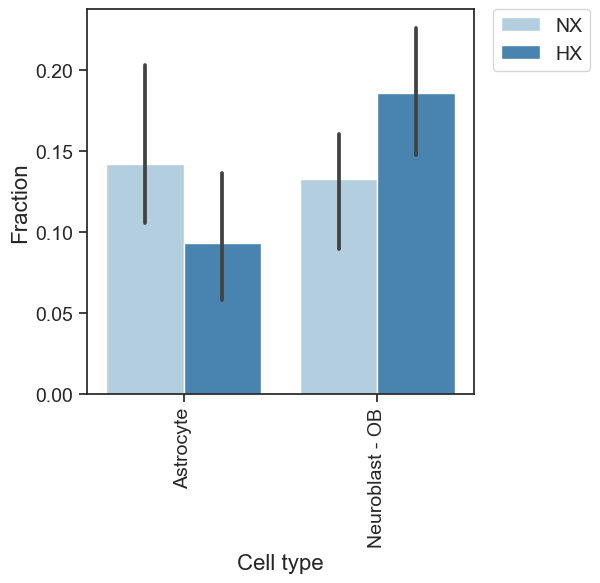

In [28]:
fig, ax = plt.subplots(figsize=(5,5))
df = pd.melt(ratios, id_vars=['Condition'], value_vars=types)
print(df)
sns.set_context('notebook')
sns.set_style('ticks')
d = sns.barplot(x='variable', y = 'value', hue="Condition", data=df, palette="Blues", hue_order=['NX', 'HX'])
d.set_ylabel('Fraction', fontsize=16)
loc, labels = plt.xticks()
d.set_xticklabels(labels, rotation=90, fontsize=14)
d.set_xlabel('Cell type',fontsize=16)
plt.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0, fontsize=14)
ax.tick_params(axis='y', labelsize=14)


# plt.savefig(plot_path + "haber_boxes_blue.svg", format="svg", bbox_inches="tight")
plt.savefig(".cell_type_condition.png", format="png", bbox_inches="tight")

plt.show()

   Condition   variable     value
0         HX  Astrocyte  0.057953
1         HX  Astrocyte  0.136631
2         HX  Astrocyte  0.084605
3         NX  Astrocyte  0.202852
4         NX  Astrocyte  0.105682
..       ...        ...       ...
85        HX   Vascular  0.020612
86        HX   Vascular  0.025196
87        NX   Vascular  0.037265
88        NX   Vascular  0.028678
89        NX   Vascular  0.026970

[90 rows x 3 columns]


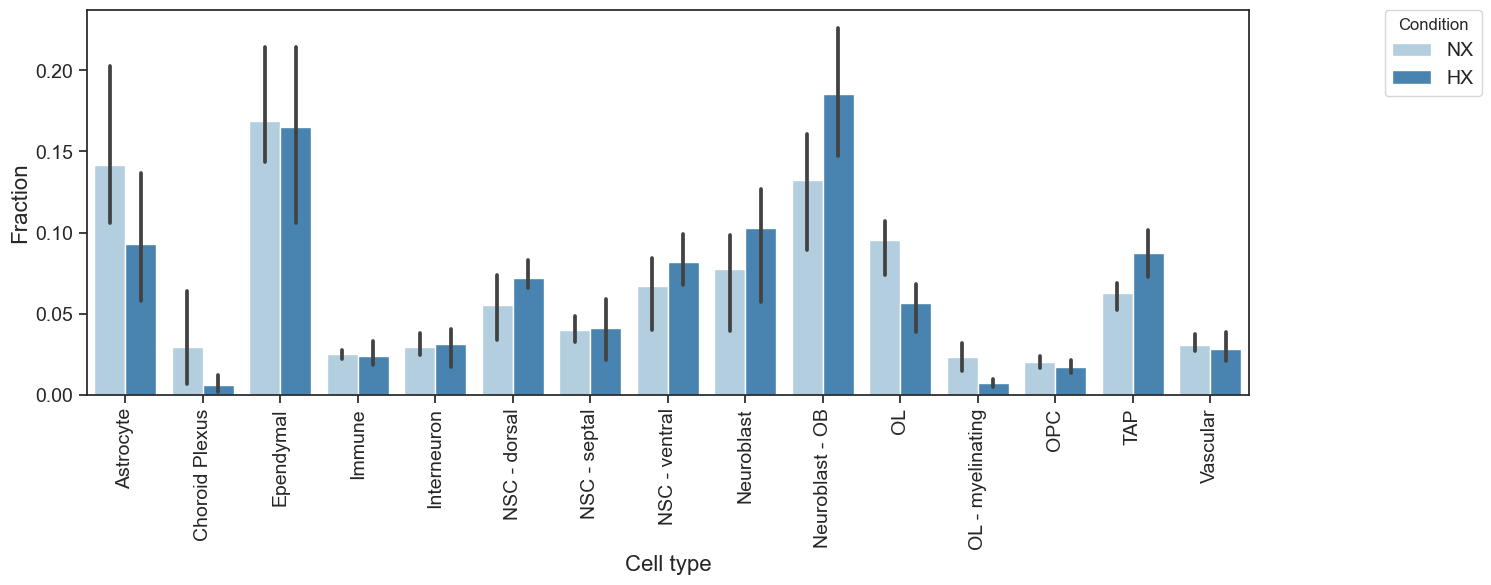

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
df = pd.melt(ratios, id_vars=['Condition'], value_vars=ratios.columns[:-1])
print(df)
sns.set_context('notebook')
sns.set_style('ticks')
d = sns.barplot(x='variable', y = 'value', hue="Condition", data=df, palette="Blues", hue_order=['NX', 'HX'])
d.set_ylabel('Fraction', fontsize=16)
loc, labels = plt.xticks()
d.set_xticklabels(labels, rotation=90, fontsize=14)
d.set_xlabel('Cell type',fontsize=16)
plt.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0., title="Condition", fontsize=14)
ax.tick_params(axis='y', labelsize=14)


# plt.savefig(plot_path + "haber_boxes_blue.svg", format="svg", bbox_inches="tight")
plt.savefig("cell_type_condition.png", format="png", bbox_inches="tight")

plt.show()

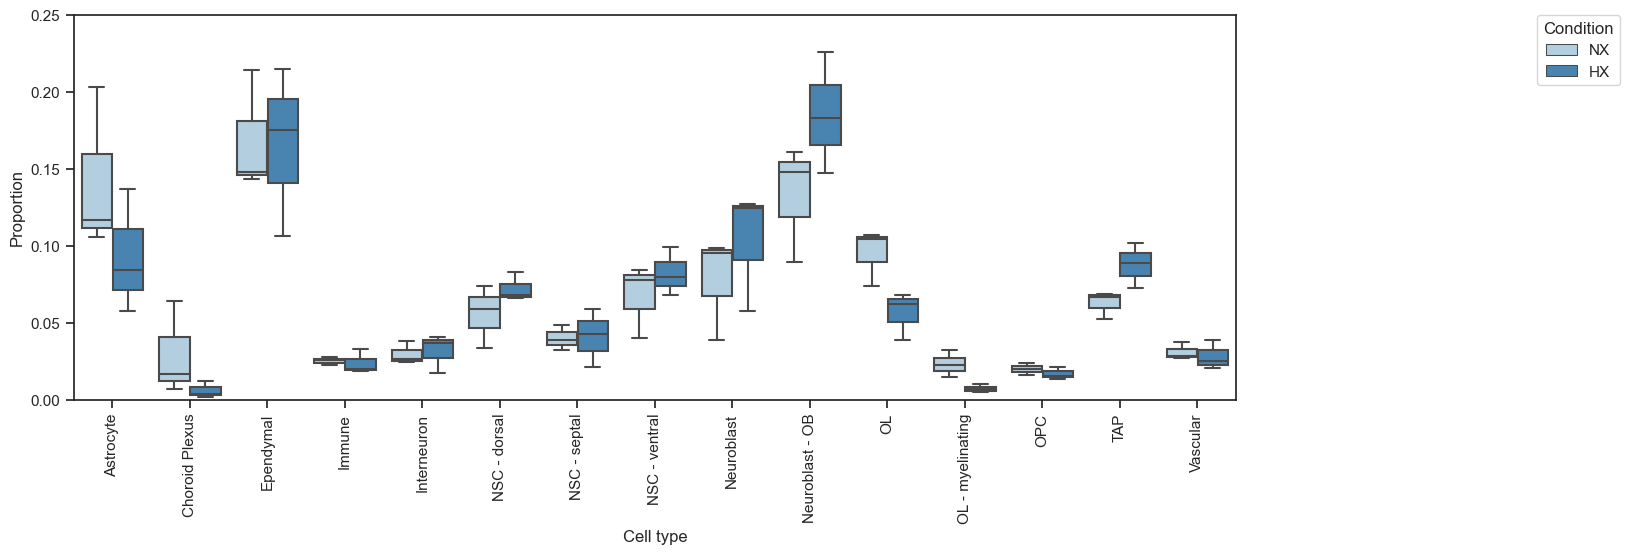

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
d = sns.boxplot(x='variable', y = 'value', hue=df["Condition"], data=df, fliersize=1, palette='Blues', hue_order=['NX', 'HX'])
d.set_ylabel('Proportion')
loc, labels = plt.xticks()
d.set_xticklabels(labels, rotation=90)
d.set_xlabel('Cell type')
d.set_ylim([0,0.25])
plt.legend(bbox_to_anchor=(1.33, 1), borderaxespad=0., title="Condition")

# plt.savefig(plot_path + "haber_boxes_blue.svg", format="svg", bbox_inches="tight")
# plt.savefig(plot_path + "haber_boxes_blue.png", format="png", bbox_inches="tight")

plt.savefig("cell_type_condition box.png", format="png", bbox_inches="tight")

plt.show()

In [25]:
reference=[data.var.index[3], data.var.index[4], data.var.index[6], data.var.index[7], data.var.index[12], data.var.index[14]]
reference

['Immune', 'Interneuron', 'NSC - septal', 'NSC - ventral', 'OPC', 'Vascular']

In [26]:
formula = "C(Condition, levels=['NX', 'HX'])"

res_cer = []
effects_cer = pd.DataFrame(index=data.var.index.copy(),
                           columns=reference)
effects_cer.index.rename("cell type", inplace=True)
effects_cer.columns.rename("reference", inplace=True)

for ct in reference:
    print(f"Reference: {ct}")
    
    model = mod.CompositionalAnalysis(data=data, formula=formula, reference_cell_type=ct)
    results = model.sample_hmc()
    _, effect_df = results.summary_prepare(est_fdr=0.4)
    res_cer.append(results)
    effects_cer[ct] = effect_df.loc[:, "Final Parameter"].array

Reference: Immune


100%|██████████| 20000/20000 [01:15<00:00, 265.10it/s]


MCMC sampling finished. (96.552 sec)
Acceptance rate: 66.8%
Reference: Interneuron


100%|██████████| 20000/20000 [01:15<00:00, 266.21it/s]


MCMC sampling finished. (95.074 sec)
Acceptance rate: 61.3%
Reference: NSC - septal


100%|██████████| 20000/20000 [01:18<00:00, 256.37it/s]


MCMC sampling finished. (99.265 sec)
Acceptance rate: 52.4%
Reference: NSC - ventral


100%|██████████| 20000/20000 [01:17<00:00, 257.12it/s]


MCMC sampling finished. (97.964 sec)
Acceptance rate: 62.4%
Reference: OPC


100%|██████████| 20000/20000 [01:14<00:00, 269.70it/s]


MCMC sampling finished. (93.648 sec)
Acceptance rate: 53.0%
Reference: Vascular


100%|██████████| 20000/20000 [01:16<00:00, 260.49it/s]


MCMC sampling finished. (97.267 sec)
Acceptance rate: 55.9%


In [27]:
effects_cer.index.name = "cell type"
effects_cer.columns.name = "reference"
print(effects_cer)

reference           Immune  Interneuron  NSC - septal  NSC - ventral  \
cell type                                                              
Astrocyte        -0.266991    -0.263466     -0.265319      -0.258787   
Choroid Plexus   -0.351396    -0.327726     -0.344461      -0.290607   
Ependymal         0.000000     0.000000      0.000000       0.000000   
Immune            0.000000     0.000000      0.000000       0.000000   
Interneuron       0.000000     0.000000      0.000000       0.000000   
NSC - dorsal      0.000000     0.000000      0.000000       0.153092   
NSC - septal      0.000000     0.000000      0.000000       0.000000   
NSC - ventral     0.000000     0.000000      0.000000       0.000000   
Neuroblast        0.173174     0.000000      0.166257       0.164051   
Neuroblast - OB   0.247300     0.247847      0.236729       0.227251   
OL               -0.288978    -0.287948     -0.301300      -0.278820   
OL - myelinating -0.286902    -0.280752     -0.289388      -0.26

In [28]:
for x in res_cer:
    x.summary_extended()

Compositional Analysis summary (extended):

Data: 6 samples, 15 cell types
Reference index: 3
Formula: C(Condition, levels=['NX', 'HX'])
Spike-and-slab threshold: 0.522

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 96.552 sec. Acceptance rate: 66.8%

Intercepts:
                  Final Parameter  HDI 3%  HDI 97%     SD  Expected Sample
Cell Type                                                                 
Astrocyte                   2.715   2.213    3.188  0.258       299.329512
Choroid Plexus              0.575  -0.159    1.368  0.410        35.217567
Ependymal                   3.015   2.603    3.411  0.217       404.052578
Immune                      1.198   0.671    1.714  0.280        65.663618
Interneuron                 1.375   0.880    1.913  0.274        78.378136
NSC - dorsal                2.035   1.565    2.484  0.247       151.645417
NSC - septal                1.632   1.138    2.119  0.261       101.346467
NSC - ventral               2.189   1.73